# Project: Wrangling and Analyze Data

<h2> Introduction</h2>

This project is the second project for the programme Data Analysis given by Udacity, and it is about the process of cleaning data.
the data that's gonna be cleaned are tweets collected from an account named WeRateDogs. The goal of this project is to master the data cleaning process by detecting 8 quality and 2 tidiness issues from the data sets, those issues need to be cleaned and stored on a CSV file. the clean data will be used after for analysis  to get some insight from it.

this part is about importing the libraries needed for this project 

In [1]:
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
import tweepy
import numpy as np
import seaborn as sb
import time
%matplotlib inline

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [146]:
archive = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

If we download the tsv file with the request library we gonna have a **binary** type object that contain the data of the tsv file, we are gonna save the data as string after decoding it and save it on a **txt file**

In [147]:
url ='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
resp = requests.get(url)
with open('imagepre.txt',"w") as file:
    file.write(resp.content.decode('utf-8'))

**To convert the file from txt to tsv we are gonna load it using pandas and save it to tsv**

In [148]:
predictions = pd.read_csv("imagepre.txt",sep='\t')
predictions.to_csv('image-predictions.tsv',sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

**the json file of the tweets is dowloaded we are gonna use json library to read it and convert ot to pandas data frame**

we will present the code to get Data from twitter API

In [ ]:
#authentication to the twitter API
consumer_key = ""
consumer_secret = ""
access_token = ""
access_token_secret = ""
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

#getting data ( we will use tweet ids from the dataframe archive)
tweets=[]
for ID in archive['tweet_id'] :
    data = api.get_status(ID)
    tweets.append({'tweet_id':ID,'retweet_count':data.retweet_count,'favorite_count':data.favorite_count})
    #we add sleep time required by the twitter API
    time.sleep(2)
tweet= pd.DataFrame(tweets,columns=['id','retweet_count','favorite_count'])
tweet.to_csv('tweet.csv')

For this project we will use twitter data given by udacity to gain some time

In [149]:
ss=[]
with open('tweet-json.txt',"r") as file:
    for line in file :
        ss.append(json.loads(line))

Converting json data to pandas DataFrame

In [150]:
tweet = pd.DataFrame(ss,columns=['id','retweet_count','favorite_count'])

In [151]:
tweet.to_csv('tweet.csv')

<h2> For performance purpuses we are gonna load just the files here without executing the code before to not load the memory with unecessary data </h2>

In [98]:
tweet=pd.read_csv('tweet.csv')
archive = pd.read_csv('twitter-archive-enhanced.csv')
predictions = pd.read_csv("image-predictions.tsv",sep='\t')

## Assessing Data
In this section, we are gonna try to detect and document at least **eight (8) quality issues and two (2) tidiness issue**. we must use **both** visual assessment
programmatic assessement to assess the data.

**Note from the instructors:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



The first step we need to have an idea about the data and the structure of the tables, we are gonna use panda's info() function for this purpose

In [3]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

At first glance we can see :
- The type of tweet_id and timestamp have wrong data types 
- that the columns in_reply_to*** has 78 nonnull values that mean that 78 tweets are replies and we need to delete those rows because we want just original tweets
- Retweeted_status*** columns shows that 181 tweets in the data frame are just retweets, which means 181 rows are duplicates of the original tweets and we need to delete those rows
- we need to delete the columns montioned above because they are not necessary for our analysis

In [154]:
archive.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1130,729113531270991872,NaN,NaN,2016-05-08 00:59:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Challenge accepted""\n10/10 https://t.co/vNjvr...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/729113531...,10,10,None,None,None,None,None
174,858107933456039936,NaN,NaN,2017-04-28 23:57:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Wyatt. He had an interview earlier tod...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/858107933...,12,10,Wyatt,None,None,None,None
1350,704113298707505153,NaN,NaN,2016-02-29 01:17:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Stanley. He's an inverted Uzbekistani wat...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704113298...,8,10,Stanley,None,None,None,None
936,753375668877008896,NaN,NaN,2016-07-13 23:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Hank. He's mischievous af. Doesn't eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/753375668...,8,10,Hank,None,None,None,None
1125,730196704625098752,NaN,NaN,2016-05-11 00:43:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Charles. He's camera shy. Tail longer ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/730196704...,6,10,Charles,None,None,None,None
1172,720389942216527872,NaN,NaN,2016-04-13 23:15:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ralphé. He patrols the lake. Looking f...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/720389942...,11,10,Ralphé,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
2228,668256321989451776,NaN,NaN,2015-11-22 02:34:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jareld. Jareld rules these waters. Lad...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668256321...,13,10,Jareld,None,None,None,None
1040,744223424764059648,NaN,NaN,2016-06-18 17:41:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is actually a pupper and I'd pet it so we...,NaN,NaN,NaN,https://twitter.com/strange_animals/status/672...,12,10,actually,None,None,pupper,None
192,855818117272018944,NaN,NaN,2017-04-22 16:18:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I HEARD HE TIED HIS OWN BOWTIE MARK AND HE JUS...,NaN,NaN,NaN,https://twitter.com/markhalperin/status/855656...,13,10,None,None,None,None,None


- the row 1465 has the name olivièr with special character é

In [155]:
archive['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [156]:
archive.query('rating_numerator<=5').sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2186,668981893510119424,NaN,NaN,2015-11-24 02:38:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Unique dog here. Oddly shaped tail. Long pink ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668981893...,4,10,None,None,None,None,None
1249,711306686208872448,NaN,NaN,2016-03-19 21:41:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",What hooligan sent in pictures w/out a dog in ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/711306686...,3,10,None,None,None,None,None
2310,666786068205871104,NaN,NaN,2015-11-18 01:12:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Unfamiliar with this breed. Ears pointy af. Wo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666786068...,2,10,None,None,None,None,None
1219,714631576617938945,NaN,NaN,2016-03-29 01:53:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Benedict. He's a feisty pup. Needs a b...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/714631576...,4,10,Benedict,None,None,None,None
730,781661882474196992,NaN,NaN,2016-09-30 01:08:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Who keeps sending in pictures without dogs in ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/781661882...,5,10,None,None,None,None,None
2312,666776908487630848,NaN,NaN,2015-11-18 00:36:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Josep. He is a Rye Manganese mix. Can ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666776908...,5,10,Josep,None,None,None,None
1680,682003177596559360,NaN,NaN,2015-12-30 01:00:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Unique dog here. Wrinkly as hell. Weird segmen...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682003177...,5,10,None,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None
2237,668142349051129856,NaN,NaN,2015-11-21 19:02:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This lil pup is Oliver. Hops around. Has wings...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668142349...,2,10,None,None,None,None,None
1583,687102708889812993,NaN,NaN,2016-01-13 02:43:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Army of water dogs here. None of them know whe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/687102708...,5,10,None,None,None,None,None


In [157]:
archive.query('rating_numerator>20').sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1843,675853064436391936,NaN,NaN,2015-12-13 01:41:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have an entire platoon of puppers. Tot...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675853064...,88,80,None,None,None,None,None
1635,684222868335505415,NaN,NaN,2016-01-05 04:00:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Someone help the girl is being mugged. Several...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684222868...,121,110,None,None,None,None,None
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None
1433,697463031882764288,NaN,NaN,2016-02-10 16:51:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Wednesday here's a bucket of pups. 44/40...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697463031...,44,40,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
1634,684225744407494656,6.842229e+17,4.196984e+09,2016-01-05 04:11:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Two sneaky puppers were not initially seen, mo...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/684225744...,143,130,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None


- after checking the tweeets of those ho has less or equal to 5, I found that the majority of the tweets are not about dogs or dogs "invisible" within the environement
- tweets that has more than 20 on rate are retweets or the image has more than one dog

In [158]:
archive['rating_denominator'].unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2], dtype=int64)

- the ratings need to be fixed. the rating system of WeRateDogs is between 10 and 20, and all denominators need to be 10.

In [160]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Unnamed: 0      2354 non-null   int64
 1   id              2354 non-null   int64
 2   retweet_count   2354 non-null   int64
 3   favorite_count  2354 non-null   int64
dtypes: int64(4)
memory usage: 73.7 KB


In [161]:
tweet.head()

,Unnamed: 0,id,retweet_count,favorite_count
0,0,892420643555336193,8853,39467
1,1,892177421306343426,6514,33819
2,2,891815181378084864,4328,25461
3,3,891689557279858688,8964,42908
4,4,891327558926688256,9774,41048


- the column Unnamed: 0 needs to be removed

In [162]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2075 non-null   int64  
 1   tweet_id    2075 non-null   int64  
 2   jpg_url     2075 non-null   object 
 3   img_num     2075 non-null   int64  
 4   p1          2075 non-null   object 
 5   p1_conf     2075 non-null   float64
 6   p1_dog      2075 non-null   bool   
 7   p2          2075 non-null   object 
 8   p2_conf     2075 non-null   float64
 9   p2_dog      2075 non-null   bool   
 10  p3          2075 non-null   object 
 11  p3_conf     2075 non-null   float64
 12  p3_dog      2075 non-null   bool   
dtypes: bool(3), float64(3), int64(3), object(4)
memory usage: 168.3+ KB


- the column p1 is not representing the data that is contains 

In [163]:
predictions.duplicated().value_counts()

False    2075
dtype: int64

In [164]:
tweet.duplicated().value_counts()

False    2354
dtype: int64

In [165]:
predictions.duplicated().value_counts()

False    2075
dtype: int64

We didn't found duplicated values on the data

### Quality issues
1.Tweet_id and timestamp have wrong data types

2.that the columns in_reply_to*** has 78 nonnull values that mean that 78 tweets are retweets and we need to delete those rows because we want just original tweets

3.retweeted_status*** columns shows that 181 tweets in the data frame are just retweets, which means 181 rows are duplicates of the original tweets and we need to delete those rows

4.we need to delete the columns montioned above with the unnamed: 0 because they are not necessary for our analysis

5.Renaming columns that are note understandble

6.the majority of rows that has less or equal to 5 are not about dogs

7.the tweets that has more that 20 on rate are about multiple dogs

8.the row 1465 has the name olivièr with special character é

### Tidiness issues
1.the three dataframes can be merged in one table

2.the colomns doggo floofer pupper puppo needs to be melted in one columns

## Cleaning Data
In this section, we will clean **all** of the issues I documented while assessing. 

**Note from instructors:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [99]:
# Make copies of original pieces of data
clean_archive = archive.copy()
clean_predictions = predictions.copy()
clean_tweet = tweet.copy()

### Issue #1: changing data types

#### Define:
tweet_id in all tables needs to be string, and timestamp need to be datetime

#### Code

In [100]:
#ID
clean_archive['tweet_id']=clean_archive['tweet_id'].astype('O')
clean_predictions['tweet_id']=clean_predictions['tweet_id'].astype('O')
clean_tweet['id']=clean_tweet['id'].astype('O')

In [101]:
# timapestamp
clean_archive=clean_archive.astype({'timestamp':'datetime64[ns]'})

#### Test

In [102]:
clean_archive['tweet_id'].dtypes

dtype('O')

In [103]:
clean_predictions['tweet_id'].dtypes

dtype('O')

In [104]:
clean_tweet['id'].dtypes

dtype('O')

In [105]:
clean_archive['timestamp'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2356 entries, 0 to 2355
Series name: timestamp
Non-Null Count  Dtype         
--------------  -----         
2356 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 18.5 KB


### Issue #2: remove reply tweets

#### Define
remove rows that is not null in the column in_reply_to_status_id

#### Code

In [106]:
clean_archive=clean_archive[clean_archive['in_reply_to_status_id'].isna()]

#### Test

In [107]:
clean_archive["in_reply_to_status_id"].info()

<class 'pandas.core.series.Series'>
Int64Index: 2278 entries, 0 to 2355
Series name: in_reply_to_status_id
Non-Null Count  Dtype  
--------------  -----  
0 non-null      float64
dtypes: float64(1)
memory usage: 35.6 KB


### Issue #3: Remove retweets

**Define :**

Remove each row that has no null values in the column **retweeted_status_id**

**Code :**

In [108]:
clean_archive=clean_archive[clean_archive['retweeted_status_id'].isna()]

**Test :**

In [109]:
clean_archive['retweeted_status_id'].info()

<class 'pandas.core.series.Series'>
Int64Index: 2097 entries, 0 to 2355
Series name: retweeted_status_id
Non-Null Count  Dtype  
--------------  -----  
0 non-null      float64
dtypes: float64(1)
memory usage: 32.8 KB


### Issue #4: Remove columns 

**Define :**

Remove columns **in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp**, **Unnamed: 0**,**p2**,**p3**

**Code :**

In [110]:
clean_archive.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1,inplace=True)

In [111]:
clean_tweet.drop('Unnamed: 0',axis=1, inplace=True)

In [112]:
clean_predictions.drop(['Unnamed: 0','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'],axis=1,inplace=True)

**Test :**

In [113]:
clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2097 non-null   object        
 1   timestamp           2097 non-null   datetime64[ns]
 2   source              2097 non-null   object        
 3   text                2097 non-null   object        
 4   expanded_urls       2094 non-null   object        
 5   rating_numerator    2097 non-null   int64         
 6   rating_denominator  2097 non-null   int64         
 7   name                2097 non-null   object        
 8   doggo               2097 non-null   object        
 9   floofer             2097 non-null   object        
 10  pupper              2097 non-null   object        
 11  puppo               2097 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 213.0+ KB


In [114]:
clean_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
dtypes: bool(1), float64(1), int64(1), object(3)
memory usage: 83.2+ KB


In [115]:
clean_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


### Issue #5: Renaming columns that are not understandble

**Define :**

Rename **p1** as **dog_race**, **p1_conf** as **confident_level** and **p1_dog** as **is_dog**

**Code :**

In [116]:
clean_predictions.rename(columns={'p1':'dog_race','p1_conf':'confident_level','p1_dog':'is_dog'},inplace=True)

**Test :**

In [117]:
clean_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tweet_id         2075 non-null   object 
 1   jpg_url          2075 non-null   object 
 2   img_num          2075 non-null   int64  
 3   dog_race         2075 non-null   object 
 4   confident_level  2075 non-null   float64
 5   is_dog           2075 non-null   bool   
dtypes: bool(1), float64(1), int64(1), object(3)
memory usage: 83.2+ KB


### Issue #6: Remove rates less or equal to 5 not about dogs

**Define :**

remove tweets that have less or equal to 5 in rates

In [118]:
clean_archive.query('rating_numerator<=5').head(20)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,2017-07-08 00:28:19,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None
315,835152434251116546,2017-02-24 15:40:31,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
730,781661882474196992,2016-09-30 01:08:10,"<a href=""http://twitter.com/download/iphone"" r...",Who keeps sending in pictures without dogs in ...,https://twitter.com/dog_rates/status/781661882...,5,10,None,None,None,None,None
765,777885040357281792,2016-09-19 15:00:20,"<a href=""http://twitter.com/download/iphone"" r...",This is Wesley. He's clearly trespassing. Seem...,https://twitter.com/dog_rates/status/777885040...,3,10,Wesley,None,None,None,None
883,760252756032651264,2016-08-01 23:15:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Fido. He can tell the weather. Not goo...,https://twitter.com/dog_rates/status/760252756...,4,10,Fido,None,None,None,None
912,757596066325864448,2016-07-25 15:19:12,"<a href=""http://twitter.com/download/iphone"" r...",Here's another picture without a dog in it. Id...,https://twitter.com/dog_rates/status/757596066...,4,10,None,None,None,None,None
956,751583847268179968,2016-07-09 01:08:47,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending it pictures that don't eve...,https://twitter.com/dog_rates/status/751583847...,5,10,None,doggo,None,pupper,None
1004,747816857231626240,2016-06-28 15:40:07,"<a href=""http://twitter.com/download/iphone"" r...",Viewer discretion is advised. This is a terrib...,https://twitter.com/dog_rates/status/747816857...,4,10,a,None,None,None,None
1165,722974582966214656,2016-04-21 02:25:47,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1189,718246886998687744,2016-04-08 01:19:36,"<a href=""http://twitter.com/download/iphone"" r...",This is Alexanderson. He's got a weird ass bir...,https://twitter.com/dog_rates/status/718246886...,3,10,Alexanderson,None,None,None,None


In the row 45 the rate is 5/10 but on the tweet we found 13.5/10 this needs to be fixed too

**Code :**

In [119]:
clean_archive.loc[clean_archive['tweet_id']==883482846933004288,'rating_numerator']=13
clean_archive=clean_archive[clean_archive['rating_numerator']>5]

**Test :**

In [120]:
clean_archive.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            2344, 2345, 2346, 2347, 2348, 2350, 2352, 2353, 2354, 2355],
           dtype='int64', length=2014)

In [121]:
clean_archive.loc[clean_archive['rating_numerator']<=5]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #7: fix the rate greater than 20

**Define :**

fix the values ho are greater than 20 because the image has multiple dogs

In [122]:
clean_archive.loc[clean_archive['rating_numerator']>20]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
433,820690176645140481,2017-01-15 17:52:40,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,2016-12-19 23:06:23,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
695,786709082849828864,2016-10-13 23:23:56,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,2016-09-20 00:24:34,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
902,758467244762497024,2016-07-28 01:00:57,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
979,749981277374128128,2016-07-04 15:00:45,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None
1120,731156023742988288,2016-05-13 16:15:54,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1202,716439118184652801,2016-04-03 01:36:11,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,2016-03-27 01:29:02,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1254,710658690886586372,2016-03-18 02:46:49,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None


-  516 will be removed and 1202, 695, 763, 1712 will be fixed

**Code :**

In [123]:
clean_archive.drop(index=516,inplace=True)

In [124]:
# 1202 11/10
clean_archive.loc[clean_archive.index==1202,'rating_numerator']=11
clean_archive.loc[clean_archive.index==1202,'rating_denominator']=10

In [125]:
# 695 9/10
clean_archive.loc[clean_archive.index==695,'rating_numerator']=9
clean_archive.loc[clean_archive.index==695,'rating_denominator']=10

In [126]:
# 763 11/10
clean_archive.loc[clean_archive.index==763,'rating_numerator']=11
clean_archive.loc[clean_archive.index==763,'rating_denominator']=10

In [127]:
# 1712 11/10
clean_archive.loc[clean_archive.index==1712,'rating_numerator']=11
clean_archive.loc[clean_archive.index==1712,'rating_denominator']=10

I spoted a pattern here with rates that are more than 20 and the denominator is greateer than 10, it means that the image has more that one dog, for example 89/80 mean that the image has 8 dogs and the note is 19/10, I'm gonna sustract the denominator out of the numerator and replace after the denominator by 10. 

In [128]:
dd=clean_archive.loc[clean_archive['rating_numerator']>20]
for i in dd.index :
    if dd['rating_denominator'][i]>10:
        clean_archive.loc[clean_archive['tweet_id']==dd['tweet_id'][i],'rating_numerator']=dd['rating_numerator'][i]-dd['rating_denominator'][i]
        clean_archive.loc[clean_archive['tweet_id']==dd['tweet_id'][i],'rating_denominator']=10
    

**Test :**

In [129]:
clean_archive.loc[clean_archive['rating_numerator']>20]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,2016-07-04 15:00:45,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None
1120,731156023742988288,2016-05-13 16:15:54,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,https://twitter.com/dog_rates/status/731156023...,34,10,this,None,None,None,None
1779,677716515794329600,2015-12-18 05:06:23,"<a href=""http://twitter.com/download/iphone"" r...",IT'S PUPPERGEDDON. Total of 144/120 ...I think...,https://twitter.com/dog_rates/status/677716515...,24,10,None,None,None,None,None
2074,670842764863651840,2015-11-29 05:52:33,"<a href=""http://twitter.com/download/iphone"" r...",After so many requests... here you go.\n\nGood...,https://twitter.com/dog_rates/status/670842764...,420,10,None,None,None,None,None


### Issue 8: the row 1465 has the name olivièr with special character é

**Define**

we are gonna replace orlivér by olivier in the row 1465

**Code**

In [130]:
clean_archive.loc[clean_archive.index==1465,'name']='Olivier'

**Test**

In [131]:
clean_archive.loc[clean_archive.index==1465].name

1465    Olivier
Name: name, dtype: object

<h2> Tidiness issues</h2>

### Issue #1: the predictions dataframe and tweet need to merged with archive

**Define**

We are gonna join the two table with an inner join

**Code**

In [132]:
newframe=clean_archive.merge(clean_predictions, how='inner', on='tweet_id')

In [133]:
newframe=newframe.merge(clean_tweet, how='inner', left_on='tweet_id', right_on='id')

In [134]:
newframe.drop('id',axis=1,inplace=True)

**Test**

In [135]:
newframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1888 entries, 0 to 1887
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1888 non-null   object        
 1   timestamp           1888 non-null   datetime64[ns]
 2   source              1888 non-null   object        
 3   text                1888 non-null   object        
 4   expanded_urls       1888 non-null   object        
 5   rating_numerator    1888 non-null   int64         
 6   rating_denominator  1888 non-null   int64         
 7   name                1888 non-null   object        
 8   doggo               1888 non-null   object        
 9   floofer             1888 non-null   object        
 10  pupper              1888 non-null   object        
 11  puppo               1888 non-null   object        
 12  jpg_url             1888 non-null   object        
 13  img_num             1888 non-null   int64       

### Issue #1: Doggo, floofer, pupper, puppo columns needs to be melted in one columns

**Define**

in one column named type we are gonna have Doggo, floofer, pupper, puppo or None

**Code**

In [136]:
for i in newframe.index:
    if(newframe.doggo[i]!='None'):
        newframe.loc[newframe.index==i,'type']='doggo'
    elif(newframe.floofer[i]!='None'):
        newframe.loc[newframe.index==i,'type']='floofer'
    elif(newframe.pupper[i]!='None'):
        newframe.loc[newframe.index==i,'type']='pupper'
    elif(newframe.puppo[i]!='None'):
        newframe.loc[newframe.index==i,'type']='puppo'
    else :
        newframe.loc[newframe.index==i,'type']='None'

In [137]:
newframe.drop(['doggo','floofer','pupper','puppo'],axis=1,inplace=True)

**Test**

In [138]:
newframe.type.value_counts()

None       1588
pupper      199
doggo        72
puppo        22
floofer       7
Name: type, dtype: int64

In [139]:
newframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1888 entries, 0 to 1887
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1888 non-null   object        
 1   timestamp           1888 non-null   datetime64[ns]
 2   source              1888 non-null   object        
 3   text                1888 non-null   object        
 4   expanded_urls       1888 non-null   object        
 5   rating_numerator    1888 non-null   int64         
 6   rating_denominator  1888 non-null   int64         
 7   name                1888 non-null   object        
 8   jpg_url             1888 non-null   object        
 9   img_num             1888 non-null   int64         
 10  dog_race            1888 non-null   object        
 11  confident_level     1888 non-null   float64       
 12  is_dog              1888 non-null   bool          
 13  retweet_count       1888 non-null   int64       



## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [140]:
newframe.to_csv('twitter_archive_master.csv',index=False)

## Analyzing and Visualizing Data
In this section, we will analyze and visualize the wrangled data. we must produce at least **three (3) insights and one (1) visualization.**

In [141]:
df = pd.read_csv('twitter_archive_master.csv')

In [142]:
df.dog_race.value_counts().head(5)

golden_retriever      136
Labrador_retriever     94
Pembroke               86
Chihuahua              76
pug                    53
Name: dog_race, dtype: int64

In [143]:
df.groupby(by='dog_race').sum().sort_values(by='retweet_count',ascending=False).head(5).retweet_count


dog_race
golden_retriever      499570
Labrador_retriever    365109
Pembroke              275922
Chihuahua             218182
Samoyed               184922
Name: retweet_count, dtype: int64

In [144]:
df.groupby(by='dog_race').sum().sort_values(by='favorite_count',ascending=False).head(5).favorite_count


dog_race
golden_retriever      1687548
Labrador_retriever    1116811
Pembroke               977775
Chihuahua              669720
Samoyed                542991
Name: favorite_count, dtype: int64

### Insights:
1.from data we can assum that the most popular dogs are the golden retriever and the labrador retriever 

2.The race of dogs that got the most of retweets are respectively **golden retriever, Labrador retriever, Pembroke and chihuahua**

3.We also found that the same order is found when we search the race of dogs that has the most favorite counts **golden retriever, Labrador retriever, Pembroke and chihuahua**

### Visualization

**Visualizaion 1**

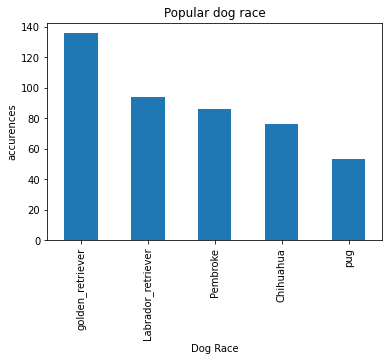

In [145]:
ax=df.dog_race.value_counts().head(5).plot.bar()
ax.set_xlabel('Dog Race')
ax.set_ylabel('accurences')
ax.set_title('Popular dog race')
plt.show()


**From this visulization we can see that golden retriever is the most popular dog race among the community of WeRateDog**

**Visualization 2**

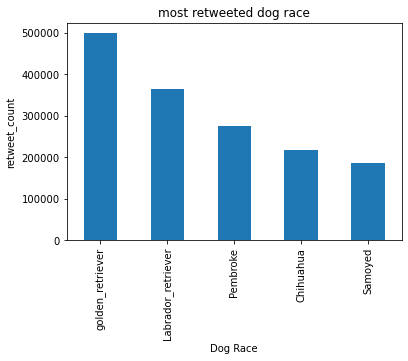

In [146]:
ax=df.groupby(by='dog_race').sum().sort_values(by='retweet_count',ascending=False).head(5).retweet_count.plot.bar()
ax.set_xlabel('Dog Race')
ax.set_ylabel('retweet_count')
ax.set_title('most retweeted dog race')
plt.show()


**this visalization shows that golden retriever have the most retweets among the other races**

**Visualization 3:**

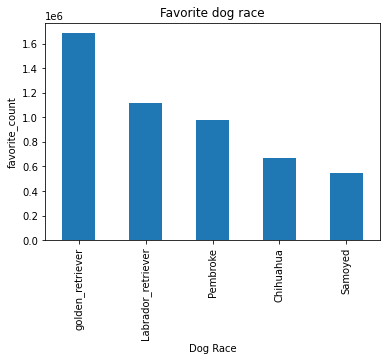

In [147]:
ax=df.groupby(by='dog_race').sum().sort_values(by='favorite_count',ascending=False).head(5).favorite_count.plot.bar()
ax.set_xlabel('Dog Race')
ax.set_ylabel('favorite_count')
ax.set_title('Favorite dog race')
plt.show()

**The same result is found when we searsh for the race ho got the most favorites in the tweets, the golden retriever is on the first place**

**Conclusion**

The golden retriever is shown as the most favorite race dog among the others, it can be because it's the most friendly and cute seen by dog owners.